## Laboratorio No. 3
- Paola De León 20361
- Gabriela Contreras 20213

In [1]:
import numpy as np
import random as rand
import scipy.stats as stats
import matplotlib.pyplot as plt

import math
import random
import numpy as np
import sympy as sp
from scipy.stats import gamma


#### Parte No.2 ( Ejercicios sobre Números Aleatorios)

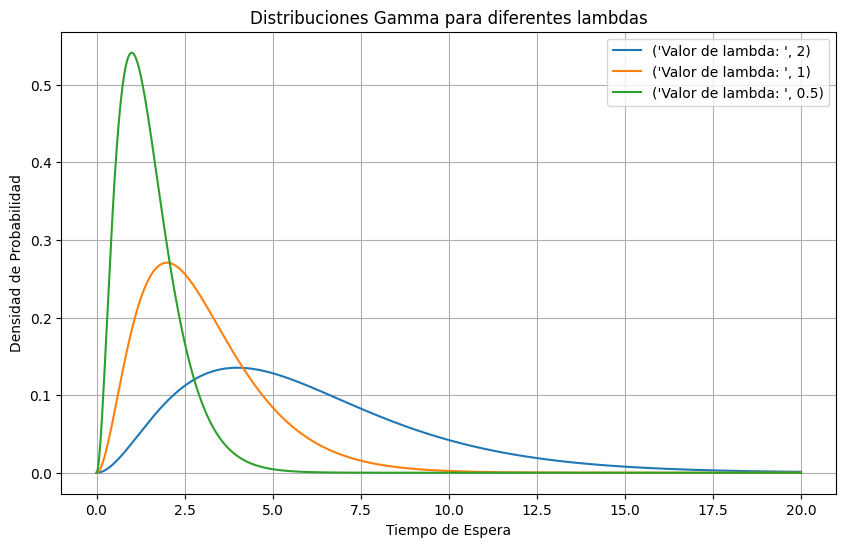


        ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera
        y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número
        de ocurrencias de un evento?

        En tanto al tiempo de espera se puede decir que existe una relación inversa en donde cuando el
        valor de lambda aumente, el tiempo de espera promedio disminuye y la dispersión de estos tiempos
        será menor. Por lo tanto, el valor lambda es un factor determinante para tiempo de espera.

    


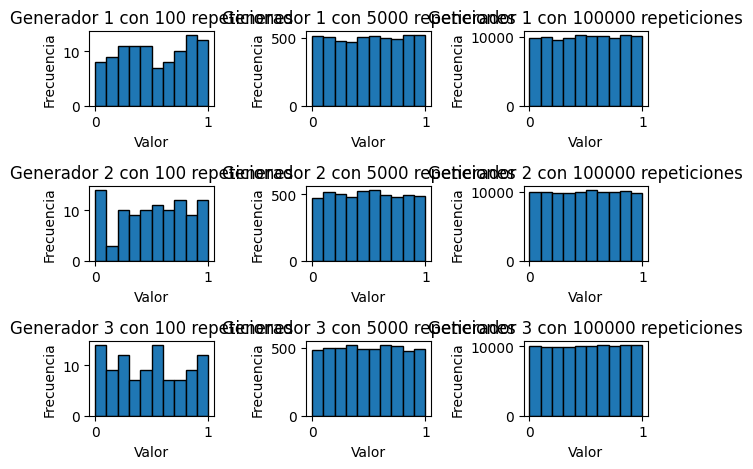


        ¿Qué generador le parece mejor? ¿Por qué?
        El primer generador nos parece mejor pues cuenta con una distribución bastante similar por lo que
        no existen valores que se repitan o mantengan en el mismo rango. Permitiendo así, obtener realmente
        un valor aleatorio.
    
    


In [4]:
def ej2_1():
    # Ejecicio 2: task 1
    # Distribución gamma

    x = np.linspace(0, 20, 1000)
    lambdas = [2, 1, 0.5]
    k = 3

    plt.figure(figsize=(10, 6))
    for lambdaVal in lambdas:
        alpha = k
        beta = 1 / lambdaVal
        
        y = gamma.pdf(x, alpha, scale=1/beta)
        labelVal = ("Valor de lambda: ", lambdaVal)
        plt.plot(x, y, label=labelVal)
        
    plt.xlabel("Tiempo de Espera")
    plt.ylabel("Densidad de Probabilidad")
    plt.title("Distribuciones Gamma para diferentes lambdas")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(
    '''
        ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera
        y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número
        de ocurrencias de un evento?

        En tanto al tiempo de espera se puede decir que existe una relación inversa en donde cuando el
        valor de lambda aumente, el tiempo de espera promedio disminuye y la dispersión de estos tiempos
        será menor. Por lo tanto, el valor lambda es un factor determinante para tiempo de espera.

    ''')

# Ejercicio 2: task 2
def generador1(n:int):
    x = 1
    m = 2**35 - 1
    numbers = []
    
    for i in range(n):
        x = 5**5 * x % m
        numbers.append(x/m)
    
    return numbers

def generador2(n:int):
    x = 1
    m = 2**31 - 1
    numbers = []

    for i in range(n):
        x = 7**5 * x % m
        numbers.append(x/m)
    
    return numbers

def generador3(n:int):
    numbers = []

    for i in range(n):
        numbers.append(rand.random())

    return numbers

def ej2_2():
    repetitions = [100, 5000, 100000]

    for i, rep in enumerate(repetitions):
        dataGenerador1 = generador1(n=rep)
        dataGenerador2 = generador2(n=rep)
        dataGenerador3 = generador3(n=rep)
        
        # Create the histogram in the corresponding subplot
        plt.subplot(3, 3, i+1)
        num_bins = 10
        plt.hist(dataGenerador1, bins=num_bins, range=(0, 1), edgecolor='black')
        plt.title(f'Generador 1 con {rep} repeticiones')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

        plt.subplot(3, 3, i+4)
        plt.hist(dataGenerador2, bins=num_bins, range=(0, 1), edgecolor='black')
        plt.title(f'Generador 2 con {rep} repeticiones')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

        plt.subplot(3, 3, i+7)
        plt.hist(dataGenerador3, bins=num_bins, range=(0, 1), edgecolor='black')
        plt.title(f'Generador 3 con {rep} repeticiones')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    print (
    '''
        ¿Qué generador le parece mejor? ¿Por qué?
        El primer generador nos parece mejor pues cuenta con una distribución bastante similar por lo que
        no existen valores que se repitan o mantengan en el mismo rango. Permitiendo así, obtener realmente
        un valor aleatorio.
    
    '''
    )

ej2_1()
ej2_2()

#### Parte No.3 (Ejercicios sobre Generación de V.A P1)

-- Muestra aleatoria generada por medio de una distribución geométrica --
5 1 1 8 1 1 5 3 3 2 2 9 1 13 5 1 6 1 3 2 2 2 1 6 3 3 10 1 1 3 4 7 1 5 2 3 1 3 4 1 1 3 1 3 2 1 1 2 9 7
1 13 1 3 1 4 1 1 2 9 3 1 2 4 3 1 2 1 2 1 2 1 4 1 9 4 3 6 2 1 12 10 2 3 4 6 2 3 3 5 12 16 1 2 1 1 1 1 7 5
7 13 1 1 3 1 10 2 8 2 1 2 3 2 3 3 3 3 5 10 2 5 1 11 7 1 8 3 2 1 2 2 11 3 3 1 1 1 4 5 3 4 1 1 2 4 1 2 6 1
2 1 2 1 1 1 1 1 2 1 10 4 3 3 5 1 3 1 4 12 2 6 2 1 1 2 3 2 4 10 1 1 7 1 2 5 4 2 4 6 7 3 2 2 1 1 13 4 5 3
9 2 1 1 2 4 1 1 3 1 3 6 1 12 4 3 2 2 1 3 11 1 1 7 14 2 1 1 3 2 1 3 1 1 2 5 3 2 2 2 1 1 2 2 1 6 4 1 3 8
2 1 4 2 5 3 1 1 4 6 1 1 1 7 3 3 3 7 4 4 2 6 2 5 5 4 1 1 2 1 5 6 2 3 1 1 1 1 12 1 1 7 1 7 8 1 10 4 2 1
1 1 1 5 4 1 2 2 1 5 4 1 3 2 6 1 3 1 3 5 9 3 6 3 1 4 3 12 1 4 5 2 2 3 4 1 3 2 1 3 1 1 2 3 3 4 1 2 1 1
12 1 7 1 3 2 2 1 2 1 2 5 1 3 2 1 5 3 1 4 2 6 3 7 11 1 6 3 15 1 1 2 6 1 1 8 2 5 2 6 8 2 4 1 8 1 2 1 1 4
2 1 1 8 4 1 9 2 4 8 7 2 8 3 2 21 3 6 6 2 2 2 1 3 7 2 1 1 5 2 8 3 5 1 5 4 2 5 5 1 1 17 1 3 7 4 1 6 6 1

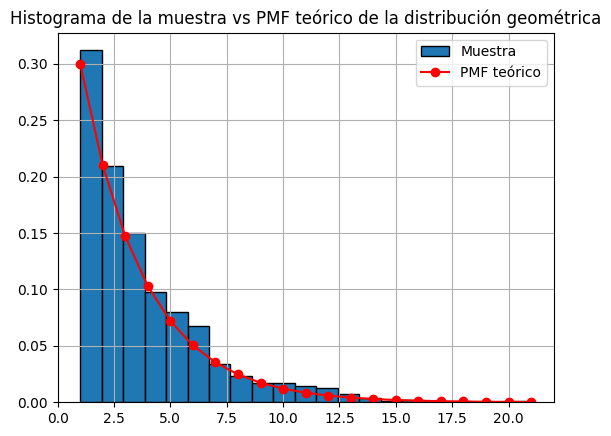

In [45]:
#TASK 1
p =  0.3 # parametro de forma 
q = 1 - p
x = 1000

#Funcion para imprimit muestra cada 50 elementos 
def imprimir_cada_x_elementos(arr):
    for i in range(0, len(arr), 50):
        sub_array = arr[i:i+50]
        print(" ".join(map(str, sub_array)))

# Transformada Inversa distribución geométrica
def inversa_distGeom(q,x):
    muestra = []
    for i in range(x):
        u = rand.uniform(0, 1)
        X = int(np.ceil(np.log(u) / np.log(q)))
        muestra.append(X)
    return muestra

# PMF teórico de la distribución geométrica
def PMF_teorico(p,x,muestra):
    k  = range(1, max(muestra) + 1)
    px = stats.geom.pmf(k,p)
    return px , k



Muestra_geometrica = inversa_distGeom(q,x)
pmf , k= PMF_teorico(p,x,Muestra_geometrica)
# Imprimir el array en notación decimal
np.set_printoptions(suppress=True)

print("-- Muestra aleatoria generada por medio de una distribución geométrica --")
imprimir_cada_x_elementos(Muestra_geometrica)


print("\n--  PMF teórico de una distribución geométrica --")
print(pmf)

print("\n--  Historgrama --")
bns = max(Muestra_geometrica)-min(Muestra_geometrica)+1
plt.hist(Muestra_geometrica, bins=bns, density=True, edgecolor='black', label='Muestra')
plt.plot(k,pmf,'ro-', label='PMF teórico')
plt.title('Histograma de la muestra vs PMF teórico de la distribución geométrica')
plt.legend()
plt.grid(True)
plt.show()
#geometrica = stats.geom(p)

-- Muestra aleatoria generada por medio de una distribución poisson --
1 5 2 2 1 2 0 2 5 1 1 1 2 2 2 2 2 1 2 2 1 1 1 1 3 2 2 3 2 2 3 2 1 2 2 3 3 1 3 1 1 2 3 0 2 1 1 2 1 1
3 3 3 1 4 3 6 1 4 2 1 1 3 1 1 2 3 2 1 2 2 2 0 0 3 1 1 3 1 2 3 1 0 2 3 0 2 3 2 1 2 2 1 0 1 2 1 1 2 2
1 1 3 2 1 1 3 2 2 1 1 2 3 4 3 1 1 3 3 4 1 2 1 1 0 1 1 3 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 2 2 4 1 1 0 3
5 1 1 3 3 1 1 2 2 2 2 2 2 1 1 1 4 2 1 2 4 1 2 2 1 2 1 1 3 1 5 2 0 2 2 1 3 3 3 1 2 1 1 1 0 2 1 1 1 1
0 4 3 1 1 2 2 3 1 1 1 1 1 2 2 1 1 5 4 2 1 1 2 2 5 1 1 2 2 3 1 1 0 1 2 1 1 4 3 1 1 1 1 2 2 4 1 2 0 1
2 1 3 1 1 2 3 1 2 3 1 2 2 3 2 0 2 1 1 2 2 1 1 2 3 3 2 2 1 1 2 1 2 1 1 0 1 1 3 2 1 1 2 3 2 1 3 2 1 0
2 0 2 2 0 0 2 2 2 2 1 2 2 1 1 3 1 3 2 1 2 3 1 3 0 3 2 3 2 2 2 2 1 1 1 2 3 2 2 1 4 2 3 3 2 2 1 3 2 2
0 1 2 2 1 1 1 2 2 2 2 2 1 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 3 1 1 0 3 2 1 5 1 3 1 1 0 3 3 2 1 1 1 2
3 2 0 1 2 0 1 2 2 2 2 1 1 1 1 1 4 2 0 2 1 1 0 3 2 1 0 9 1 1 1 3 1 1 2 2 3 2 1 1 3 2 3 1 0 1 2 1 1 1
1 3 2 1 1 2 1 1 1 1 1 1 1 2 2

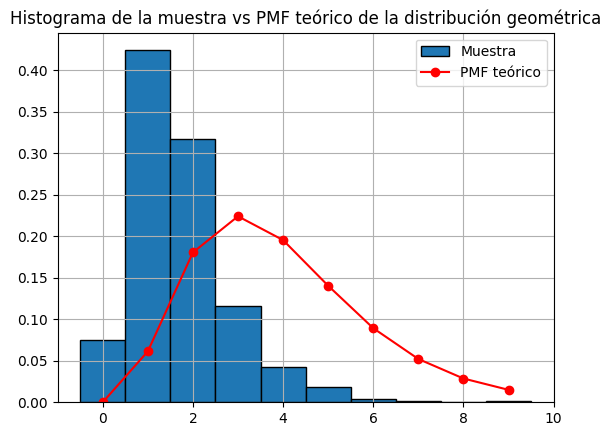

In [67]:
# TASK 2
lambd = 3
x = 1000

#Funcion para imprimit muestra cada 50 elementos 
def imprimir_cada_x_elementos(arr):
    for i in range(0, len(arr), 50):
        sub_array = arr[i:i+50]
        print(" ".join(map(str, sub_array)))

def negative_poisson(x):
    muestra = []
    C = stats.poisson.pmf(lambd,3) / (3 * np.exp(-3) / 2)
    while len(muestra) < x:
        y = np.random.exponential(scale=1)
        u = np.random.uniform(0, 1)
        
        res = stats.poisson.pmf(lambd,y) / (C * stats.expon.pdf(y))

        if u <= res * C:
            muestra.append(int(y))
    return muestra

Muestra_negativa = negative_poisson(x)

print("-- Muestra aleatoria generada por medio de una distribución poisson --")
imprimir_cada_x_elementos(Muestra_negativa)


k = np.arange(0, max(Muestra_negativa) + 1)
pmf = [stats.poisson.pmf(lambd,k) for k in k]


print("\n--  Historgrama --")
bns = np.arange(-0.5, max(Muestra_negativa) + 1.5, 1)
plt.hist(Muestra_negativa, bins=bns, density=True, edgecolor='black', label='Muestra')
plt.plot(k,pmf,'ro-', label='PMF teórico')
plt.title('Histograma de la muestra vs PMF teórico de la distribución geométrica')
plt.legend()
plt.grid(True)
plt.show()
        

-- Muestra aleatoria generada por medio de una distribución poisson --
6 6 8 8 10 7 9 7 10 10 9 8 9 8 8 4 6 9 9 8 10 5 8 9 10 5 8 5 8 6 8 8 9 8 7 10 9 5 8 10 9 9 10 1 7 10 7 7 7 9
10 9 4 9 10 4 8 7 9 10 7 7 7 9 8 10 9 9 7 10 7 10 7 9 4 10 7 4 10 7 10 9 7 9 7 7 10 7 7 10 7 3 10 10 5 3 5 9 7 6
7 7 9 8 10 9 7 6 6 9 3 10 4 8 8 8 10 7 10 10 7 4 10 10 9 9 10 10 10 10 10 7 6 3 9 7 7 10 10 10 10 9 10 9 5 4 6 5 9 7
9 9 9 9 5 6 9 5 7 9 5 10 8 10 9 7 7 2 9 3 8 10 10 7 6 8 4 10 8 10 9 8 10 4 10 5 2 5 7 8 7 10 10 6 7 9 10 7 7 8
2 3 8 10 10 8 10 9 4 8 10 8 9 10 8 9 9 7 10 3 10 9 8 7 7 9 5 6 7 8 6 6 8 10 9 9 10 10 9 5 9 6 9 10 7 8 9 9 8 10
10 9 8 9 9 4 8 5 6 5 7 5 10 8 9 9 10 4 5 10 8 9 10 5 7 9 9 10 4 9 9 9 10 8 10 8 10 10 10 7 8 9 5 9 10 9 7 6 8 10
4 7 4 5 10 3 7 8 10 7 8 10 3 8 8 10 9 4 9 8 10 9 8 5 9 7 3 7 10 10 10 7 9 10 6 5 10 5 6 7 7 9 6 10 10 8 9 10 10 9
6 8 9 7 8 8 3 5 10 8 8 10 10 8 10 7 9 5 8 10 9 10 3 6 7 10 8 9 9 10 10 6 5 7 9 5 6 9 4 10 8 10 10 7 9 3 9 6 8 9
9 6 10 7 7 9 6 5 6 10 10 10 

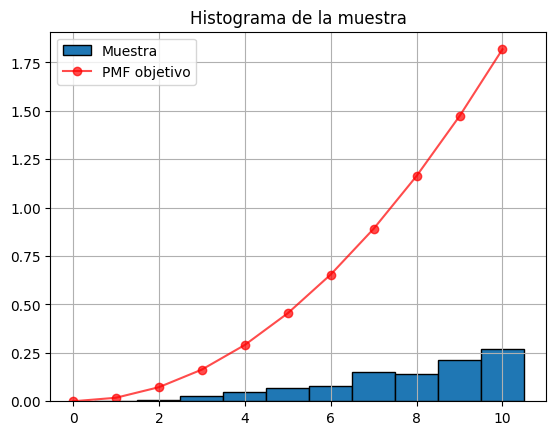

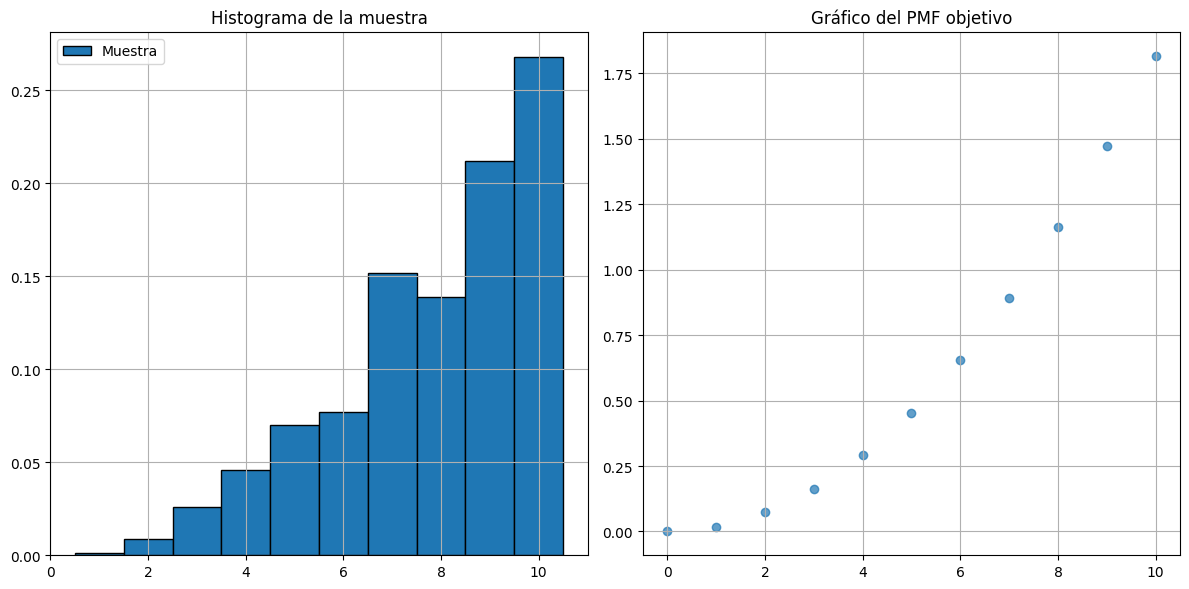

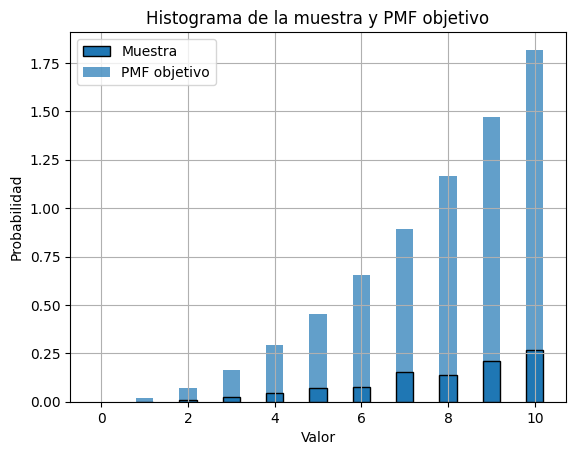

In [163]:
#TASK 3
x = 1000
val = np.arange(0, 11)

def imprimir_cada_x_elementos(arr):
    for i in range(0, len(arr), 50):
        sub_array = arr[i:i+50]
        print(" ".join(map(str, sub_array)))
        
def aceptacion_rechazo(x,val,prop,C):
    muestra = []
    while len(muestra) < x:
        y = np.random.choice(val)
        u = np.random.uniform(0, 1)
        
        res = (np.power(y,2)) / 55/ (C * prop[y - 1])

        if u <= res :
            muestra.append(int(y))
    return muestra
 
x = 1000
val = np.arange(0, 11)
prob = [(np.power(i,2)) / 55 for i in val]
propuesta = np.ones_like(val) / len(val)
C = max(prob) / max(propuesta)
muestra_def = aceptacion_rechazo(x,val,propuesta,C)


print("-- Muestra aleatoria generada por medio de una distribución poisson --")
imprimir_cada_x_elementos(muestra_def)


print("\n--  Historgrama --")
#OPCION 1 
plt.hist(muestra_def, bins=np.arange(0.5, 10.6, 1), density=True, edgecolor='black', label='Muestra')
plt.plot(val, prob,'ro-', label='PMF objetivo', alpha=0.7)
plt.title('Histograma de la muestra')
plt.legend()
plt.grid(True)
plt.show()


#OPCION 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(muestra_def, bins=np.arange(0.5, 10.6, 1), density=True, edgecolor='black', label='Muestra')
ax1.set_title('Histograma de la muestra')
ax1.legend()
ax1.grid(True)

ax2.scatter(val, prob, label='PMF objetivo', alpha=0.7)
ax2.set_title('Gráfico del PMF objetivo')
ax2.grid(True)


plt.tight_layout()
plt.show()

#OPCION 3
plt.bar(val, prob, label='PMF objetivo', alpha=0.7, width=0.4)
plt.hist(muestra_def, bins=np.arange(0.5, 10.6, 1), density=True, edgecolor='black', label='Muestra', rwidth=0.4)
plt.title('Histograma de la muestra y PMF objetivo')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

#### Parte No.4 (Ejercicios sobre Generación de V.A P2)